# Introduction to Qiskit
Welcome to the Quantum Challenge! Here you will be using Qiskit, the open source quantum software development kit developed by IBM Quantum and community members around the globe. The following exercises will familiarize you with the basic elements of Qiskit and quantum circuits. 

To begin, let us define what a quantum circuit is:

> **"A quantum circuit is a computational routine consisting of coherent quantum operations on quantum data, such as qubits. It is an ordered sequence of quantum gates, measurements, and resets, which may be conditioned on real-time classical computation."** (https://qiskit.org/textbook/ch-algorithms/defining-quantum-circuits.html)

While this might be clear to a quantum physicist, don't worry if it is not self-explanatory to you.  During this exercise you will learn what a qubit is, how to apply quantum gates to it, and how to measure its final state. You will then be able to create your own quantum circuits! By the end, you should be able to explain the fundamentals of quantum circuits to your colleagues.

Before starting with the exercises, please run cell *Cell 1* below by clicking on it and pressing 'shift' + 'enter'. This is the general way to execute a code cell in the Jupyter notebook environment that you are using now. While it is running, you will see `In [*]:` in the top left of that cell. Once it finishes running, you will see a number instead of the star, which indicates how many cells you've run. You can find more information about Jupyter notebooks here: https://qiskit.org/textbook/ch-prerequisites/python-and-jupyter-notebooks.html.

---
For useful tips to complete this exercise as well as pointers for communicating with other participants and asking questions, please take a look at the following [repository](https://github.com/qiskit-community/may4_challenge_exercises). You will also find a copy of these exercises, so feel free to edit and experiment with these notebooks.

---

In [4]:
# Cell 1
import numpy as np

from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from IPython.display import display, Math, Latex

from may4_challenge import plot_state_qsphere
from may4_challenge.ex1 import minicomposer
from may4_challenge.ex1 import check1, check2, check3, check4, check5, check6, check7, check8
from may4_challenge.ex1 import return_state, vec_in_braket, statevec

## Exercise I:  Basic Operations on Qubits and Measurements

### Writing down single-qubit states
Let us start by looking at a single qubit. The main difference between a classical bit, which can take the values 0 and 1 only, is that a quantum bit, or **qubit**, can be in the states $\vert0\rangle$, $\vert1\rangle$, as well as a linear combination of these two states. This feature is known as superposition, and allows us to write the most general state of a qubit as: 

$$\vert\psi\rangle = \sqrt{1-p}\vert0\rangle + e^{i \phi} \sqrt{p}  \vert1\rangle$$

If we were to measure the state of this qubit, we would find the result $1$ with probability $p$, and the result $0$ with probability $1-p$. As you can see, the total probability is $1$, meaning that we will indeed measure either $0$ or $1$, and no other outcomes exists.

In addition to $p$, you might have noticed another parameter above. The variable $\phi$ indicates the relative quantum phase between the two states $\vert0\rangle$ and $\vert1\rangle$. As we will discover later, this relative phase is quite important. For now, it suffices to note that the quantum phase is what enables interference between quantum states, resulting in our ability to write quantum algorithms for solving specific tasks.

If you are interested in learning more, we refer you to [the section in the Qiskit textbook on representations of single-qubit states](https://qiskit.org/textbook/ch-states/representing-qubit-states.html).

### Visualizing quantum states
We visualize quantum states throughout this exercise using what is known as a `qsphere`. Here is how the `qsphere` looks for the states $\vert0\rangle$ and $\vert1\rangle$, respectively. Note that the top-most part of the sphere represents the state $\vert0\rangle$, while the bottom represents $\vert1\rangle$.

<img src="qsphere01.png" alt="qsphere with states 0 and 1" style="width: 400px;"/>

It should be no surprise that the superposition state with quantum phase $\phi = 0$ and probability $p = 1/2$ (meaning an equal likelihood of measuring both 0 and 1) is shown on the `qsphere` with two points. However, note also that the size of the circles at the two points is smaller than when we had simply $\vert0\rangle$ and $\vert1\rangle$ above. This is because the size of the circles is proportional to the probability of measuring each one, which is now reduced by half.

<img src="qsphereplus.png" alt="qsphere with superposition 1" style="width: 200px;"/>

In the case of superposition states, where the quantum phase is non-zero, the qsphere allows us to visualize that phase by changing the color of the respective blob. For example, the state with $\phi = 90^\circ$ (degrees) and probability $p = 1/2$ is shown in the `qsphere` below. 

<img src="qspherey.png" alt="qsphere with superposition 2" style="width: 200px;"/>

### Manipulating qubits
Qubits are manipulated by applying quantum gates. Let's go through an overview of the different gates that we will consider in the following exercises.

First, let's describe how we can change the value of $p$ for our general quantum state. To do this, we will use two gates:

1. **$X$-gate**: This gate flips between the two states $\vert0\rangle$ and $\vert1\rangle$. This operation is the same as the classical NOT gate. As a result, the $X$-gate is sometimes referred to as a bit flip or NOT gate. Mathematically, the $X$ gate changes $p$ to $1-p$, so in particular from 0 to 1, and vice versa.

2. **$H$-gate**: This gate allows us to go from the state $\vert0\rangle$  to the state $\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$. This state is also known as the $\vert+\rangle$. Mathematically, this means going from $p=0, \phi=0$ to  $p=1/2, \phi=0$.  As the final state of the qubit is a superposition of $\vert0\rangle$ and $\vert1\rangle$, the Hadamard gate represents a true quantum operation.

Notice that both gates changed the value of $p$, but not $\phi$. Fortunately for us, it's quite easy to visualize the action of these gates by looking at the figure below.

<img src="quantumgates.png" alt="quantum gates" style="width: 400px;"/>

Once we have the state $\vert+\rangle$, we can then change the quantum phase by applying several other gates. For example, an $S$ gate adds a phase of $90$ degrees to $\phi$, while the $Z$ gate adds a phase of $180$ degrees to $\phi$. To subtract a phase of $90$ degrees, we can apply the $S^\dagger$ gate, which is read as S-dagger, and commonly written as `sdg`. Finally, there is a $Y$ gate which applies a sequence of $Z$ and $X$ gates.

You can experiment with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to become accustomed to the different operations and how they affect the state of a qubit. To do so, you can run *Cell 2* which starts our circuit widget. After running the cell, choose a gate to apply to a qubit, and then choose the qubit (in the first examples, the only qubit to choose is qubit 0).  Watch how the corresponding state changes with each gate, as well as the description of that state. It will also provide you with the code that creates the corresponding quantum circuit in Qiskit below the qsphere.

If you want to learn more about describing quantum states, Pauli operators, and other single-qubit gates, see chapter 1 of our textbook: https://qiskit.org/textbook/ch-states/introduction.html.

In [5]:
# Cell 2
# press shift + return to run this code cell
# then, click on the gate that you want to apply to your qubit
# next, you have to choose the qubit that you want to apply it to (choose '0' here)
# click on clear to restart
minicomposer(1, dirac=True, qsphere=True)

Label(value='Select a gate to add to the circuit:')

HTML(value='')

Here are four small exercises to attain different states on the qsphere. You can either solve them with the widget above and copy paste the code it provides into the respective cells to create the quantum circuits, or you can directly insert a combination of the following code lines into the program to apply the different gates: 

    qc.x(0)    # bit flip
    qc.y(0)    # bit and phase flip
    qc.z(0)    # phase flip
    qc.h(0)    # superpostion
    qc.s(0)    # quantum phase rotation by pi/2 (90 degrees)
    qc.sdg(0)  # quantum phase rotation by -pi/2 (90 degrees)
    
The '(0)' indicates that we apply this gate to qubit 'q0', which is the first (and in this case only) qubit.

Try to attain the given state on the qsphere in each of the following exercises.
### I.i) Let us start  by performing a bit flip. The goal is to reach the state $\vert1\rangle$ starting from state $\vert0\rangle$. <img src="state1.png" width="300"> 


If you have reached the desired state with the widget, copy and paste the code from *Cell 2* into *Cell 3* (where it says "FILL YOUR CODE IN HERE") and run it to check your solution.

Correct 🎉! Well done!
Your progress: 7/8


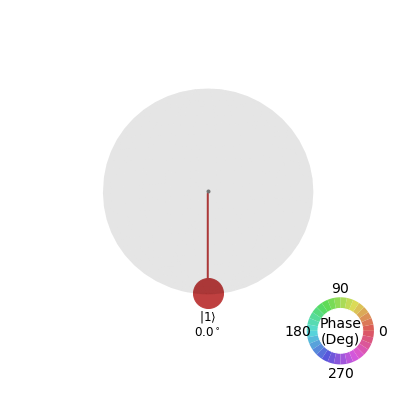

In [67]:
# Cell 3
def create_circuit():
    qc = QuantumCircuit(1)
    qc.x(0)
    return qc
qc = create_circuit()
state = statevec(qc)
check1(state)
plot_state_qsphere(state.data, show_state_labels=True, show_state_angles=True) 

### I.ii) Next, let's create a superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. <img src="stateplus.png" width="300"> 
Fill in the code in the lines indicated in *Cell 4*. If you prefer the widget, you can still copy the code that the widget gives in *Cell 2* and paste it into *Cell 4*.

Correct 🎉! Well done!
Your progress: 8/8


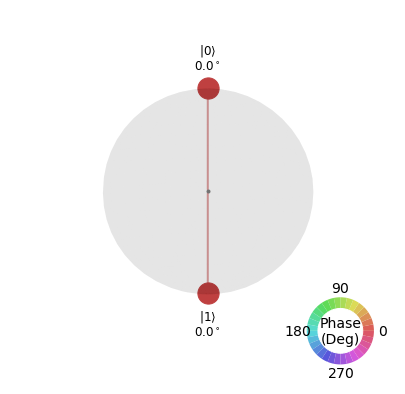

In [68]:
# Cell 4
def create_circuit2():
    qc = QuantumCircuit(1)
    qc.h(0)
    return qc

qc = create_circuit2()
state = statevec(qc)
check2(state)
plot_state_qsphere(state.data, show_state_labels=True, show_state_angles=True) 

### I.iii) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. <img src="stateminus.png" width="300"> 
Can you combine the above two tasks to come up with the solution?

Correct 🎉! Well done!
Your progress: 3/8


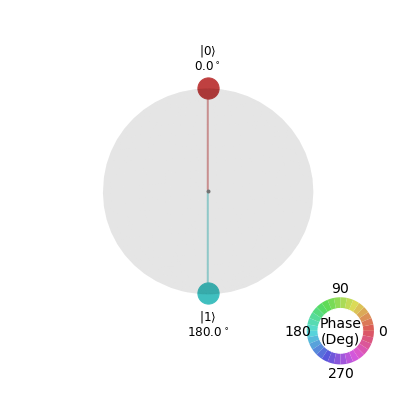

In [53]:
# Cell 5
def create_circuit3():
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    return qc

qc = create_circuit3()
state = statevec(qc)
check3(state)
plot_state_qsphere(state.data, show_state_labels=True, show_state_angles=True) 

### I.iv) Finally, we move on to the complex numbers. The goal is to reach the state $|\circlearrowleft\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. <img src="stateleft.png" width="300"> 

Correct 🎉! Well done!
Your progress: 4/8


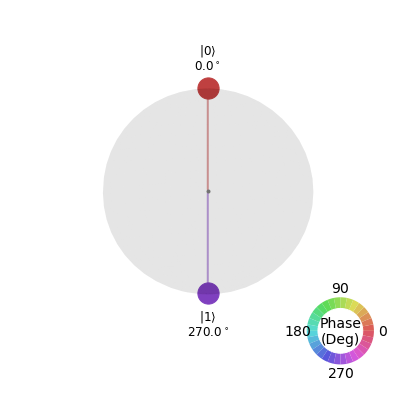

In [54]:
# Cell 6
def create_circuit4():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.sdg(0)
    return qc

qc = create_circuit4()
state = statevec(qc)
check4(state)
plot_state_qsphere(state.data, show_state_labels=True, show_state_angles=True) 


## Exercise II: Quantum Circuits Using Multi-Qubit Gates

Great job! Now that you've understood the single-qubit gates, let us look at gates operating on multiple qubits. The basic gates on two qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

If you'd like to read more about the different multi-qubit gates and their relations, visit chapter 2 of our textbook: https://qiskit.org/textbook/ch-gates/introduction.html.

As before, you can use the two-qubit circuit widget below to see how the combined two qubit state evolves when applying different gates (run *Cell 7*) and get the corresponding code that you can copy and paste into the program. Note that for two qubits a general state is of the form $a|00\rangle + b |01\rangle + c |10\rangle + d|11\rangle$, where $a$, $b$, $c$, and $d$ are complex numbers whose absolute values squared give the probability to measure the respective state; e.g., $|a|^2$ would be the probability to end in state '0' on both qubits. This means we can now have up to four points on the qsphere.

In [55]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [12]:
# Cell 7
# press shift + return to run this code cell
# then, click on the gate that you want to apply followed by the qubit(s) that you want it to apply to
# for controlled gates, the first qubit you choose is the control qubit and the second one the target qubit
# click on clear to restart


minicomposer(3, dirac=True, qsphere=True)

Label(value='Select a gate to add to the circuit:')

HTML(value='')

/opt/conda/lib/python3.7/site-packages/qiskit/util.py:109: DeprecationWarning: The QuantumCircuit.iden() method is deprecated as of 0.14.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.i() method instead.
  return func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/qiskit/util.py:109: DeprecationWarning: The QuantumCircuit.iden() method is deprecated as of 0.14.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.i() method instead.
  return func(*args, **kwargs)


CircuitError: 'duplicate qubit arguments'

We start with the canonical two qubit gate, the controlled-NOT (also CNOT or CX) gate.  Here, as with all controlled two qubit gates, one qubit is labelled as the "control", while the other is called the "target". If the control qubit is in state $|0\rangle$, it applies the identity $I$ gate to the target, i.e., no operation is performed. Instead, if the control qubit is in state $|1\rangle$, an X-gate is performed on the target qubit. Therefore, with both qubits in one of the two classical states, $|0\rangle$ or $|1\rangle$, the CNOT gate is limited to classical operations.

This situation changes dramatically when we first apply a Hadamard gate to the control qubit, bringing it into the superposition state $|+\rangle$.  The action of a CNOT gate on this non-classical input can produce highly entangled states between control and target qubits. If the target qubit is initially in the $|0\rangle$ state, the resulting state is denoted by $|\Phi^+\rangle$, and is one of the so-called Bell states. 

### II.i) Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.  <img src="phi+.png" width="300"> 
For this state we would have probability $\frac{1}{2}$ to measure "00" and probability $\frac{1}{2}$ to measure "11". Thus, the outcomes of both qubits are perfectly correlated.

<IPython.core.display.Math object>

Correct 🎉! Well done!
Your progress: 5/8


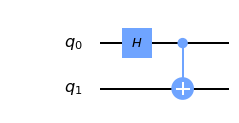

In [56]:
# Cell 8
def create_circuit():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0,1)
    return qc

qc = create_circuit()
state = statevec(qc) # determine final state after running the circuit
display(Math(vec_in_braket(state.data)))
check5(state)
qc.draw(output='mpl') # we draw the circuit

Next, try to create the state of perfectly anti-correlated qubits. Note the minus sign here, which indicates the relative phase between the two states. 
### II.ii) Construct the Bell state $\vert\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$. <img src="psi-.png" width="300"> 

<IPython.core.display.Math object>

Correct 🎉! Well done!
Your progress: 6/8


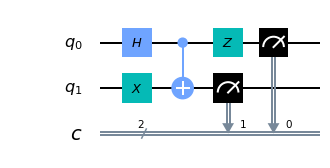

In [57]:
# Cell 9
def create_circuit6():
    qc = QuantumCircuit(2,2) # this time, we not only want two qubits, but also 
                             # two classical bits for the measurement later
    qc.h(0)
    qc.x(1)
    qc.cx(0, 1)
    qc.z(0)
    return qc

qc = create_circuit6()
state = statevec(qc) # determine final state after running the circuit
display(Math(vec_in_braket(state.data)))
check6(state)
qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
qc.draw(output='mpl') # we draw the circuit

As you can tell from the circuit (and the code) we have added measurement operators to the circuit. Note that in order to store the measurement results, we also need two classical bits, which we have added when creating the quantum circuit: `qc = QuantumCircuit(num_qubits, num_classicalbits)`.

In *Cell 10* we have defined a function `run_circuit()` that will run a circuit on the simulator. If the right state is prepared, we have probability $\frac{1}{2}$ to measure each of the two outcomes, "01" and "10". However, performing the measurement with 1000 shots does not imply that we will measure exactly 500 times "01" and 500 times "10".  Just like flipping a coin multiple times, it is unlikely that one will get exactly a 50/50 split between the two possible output values.  Instead, there are fluctuations about this ideal distribution. You can call `run_circuit` multiple times to see the variance in the ouput.


{'10': 502, '01': 498}


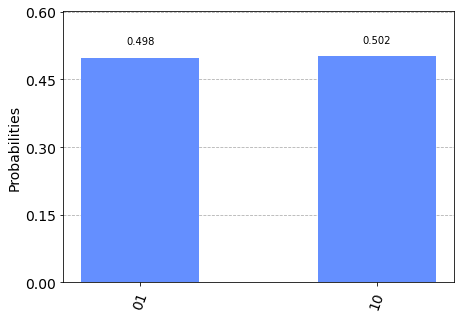

In [58]:
# Cell 10
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 1000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

### II.iii) You are given the quantum circuit described in the function below. Swap the states of the first and the second qubit.  
This should be your final state: <img src="stateIIiii.png" width="300"> 

In [64]:
# Cell 11
def create_circuit7():
    qc = QuantumCircuit(2)
    qc.rx(np.pi/3,0)
    qc.x(1)
    qc.swap(0,1)
    return qc

qc = create_circuit7()
#
def create_circuit():
    qc.x(0)
    qc.h(0)
    qc.sdg(1)
    qc.swap(0,1)

state = statevec(qc) # determine final state after running the circuit
display(Math(vec_in_braket(state.data)))
check7(state)
plot_state_qsphere(state.data, show_state_labels=True, show_state_angles=True) 

<IPython.core.display.Math object>

Correct 🎉! Well done!
Your progress: 7/8


TypeError: plot_state_qsphere() got an unexpected keyword argument 'show_state_labels'

### II.iv) Write a program from scratch that creates the GHZ state (on three qubits), $\vert \text{GHZ}\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$, performs a measurement with 2000 shots, and returns the counts.  <img src="ghz.png" width="300"> 
If you want to track the state as it is evolving, you could use the circuit widget from above for three qubits, i.e., `minicomposer(3, dirac=True, qsphere=True)`. For how to get the counts of a measurement, look at the code in *Cell 9* and *Cell 10*.

In [61]:
# Cell 12
def create_circuit8():
    qc = QuantumCircuit(3,3)
    
    def create_circuit():
        qc = QuantumCircuit(3)
    qc.h(2)
    qc.cx(2, 1)
    qc.cx(1, 0)
    return qc

qc = create_circuit8()
state = statevec(qc) # determine final state after running the circuit
display(Math(vec_in_braket(state.data)))
qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc.measure(1, 1) 
qc.measure(2, 2)# we perform a measurement on qubit q_1 and store the information on the classical bit c_1
qc.draw(output='mpl')
plot_state_qsphere(state.data,show_state_labels=True, show_state_angles=True)
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 2000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
check8(counts)
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

<IPython.core.display.Math object>

TypeError: plot_state_qsphere() got an unexpected keyword argument 'show_state_labels'

Congratulations for finishing this introduction to Qiskit! Once you've reached all 8 points, the solution string will be displayed. You need to copy and paste that string on the IBM Quantum Challenge page to complete the exercise and track your progress.

Now that you have created and run your first quantum circuits, you are ready for the next exercise, where we will make use of the actual hardware and learn how to reduce the noise in the outputs.